In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
df = pd.read_csv('/content/dataset.csv')
df1 = df[~df['metric'].isin(['Number', 'Rate'])]
df1['val'] = df1['val'] * 100
df1['upper'] = df1['upper'] * 100
df1['lower'] = df1['lower'] * 100
df1.columns = (df1.columns
                      .str.lower()
                      .str.replace('(', '')
                      .str.replace(')', '')
                      .str.strip()
                      .str.replace(' ','_'))
df1.head()
data = df1[['location', 'cause','year', 'val', 'upper', 'lower']]
data.head()

<ipython-input-2-d19313a5a3cf>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['val'] = df1['val'] * 100
<ipython-input-2-d19313a5a3cf>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['upper'] = df1['upper'] * 100
<ipython-input-2-d19313a5a3cf>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

,location,cause,year,val,upper,lower
1,Central Asia,Bipolar disorder,1990,0.491352,0.624703,0.375794
4,Central Asia,Bipolar disorder,1991,0.491464,0.623661,0.375405
7,Central Asia,Bipolar disorder,1992,0.491862,0.623428,0.375766
10,Central Asia,Bipolar disorder,1993,0.492494,0.623542,0.376816
13,Central Asia,Bipolar disorder,1994,0.493570,0.625474,0.377986


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1350 entries, 1621 to 38842
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   location  1350 non-null   object 
 1   cause     1350 non-null   object 
 2   year      1350 non-null   int64  
 3   val       1350 non-null   float64
 4   upper     1350 non-null   float64
 5   lower     1350 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 73.8+ KB


<ipython-input-3-1606d47d4af5>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  na_depressive_data['year'] = pd.to_datetime(na_depressive_data['year'], format='%Y')


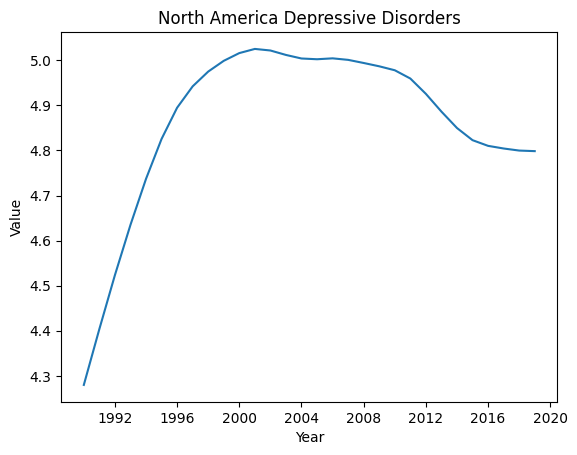

In [3]:
depdata= data[~data['cause'].isin(['Bipolar disorder','Autism spectrum disorders', 'Eating disorders', 'Idiopathic developmental intellectual disability','Anxiety disorders','Attention-deficit/hyperactivity disorder', 'Conduct disorder','Other mental disorders','Schizophrenia'])]
depdata.info()
# subset the data to only include rows where location is North America and cause is Depressive disorders
na_depressive_data = depdata[(depdata['location'] == 'North America') & (depdata['cause'] == 'Depressive disorders')]

# convert the year column to a datetime type
na_depressive_data['year'] = pd.to_datetime(na_depressive_data['year'], format='%Y')

# plot the time series
plt.plot(na_depressive_data['year'], na_depressive_data['val'])
plt.title('North America Depressive Disorders')
plt.xlabel('Year')
plt.ylabel('Value')
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


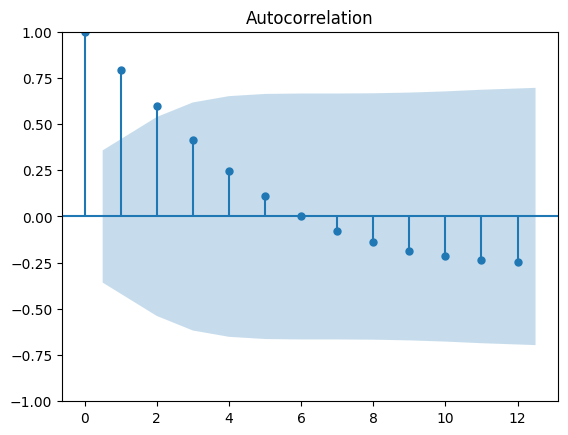

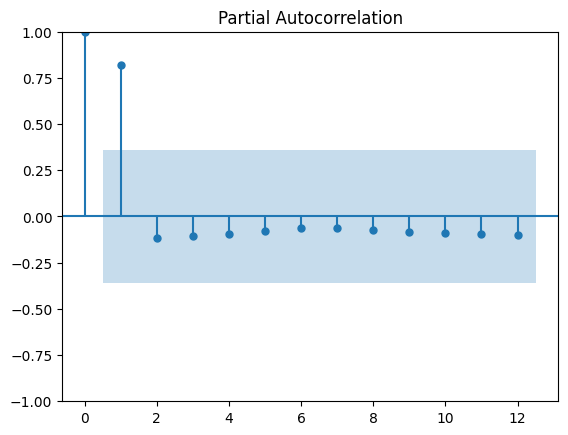

In [4]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(na_depressive_data['val'].values, lags = 12)
plot_pacf(na_depressive_data['val'].values, lags = 12)
plt.show()

INFO:prophet:Found custom seasonality named 'yearly', disabling built-in 'yearly' seasonality.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnm2au6sd/s824x4xu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnm2au6sd/dr182l4d.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30701', 'data', 'file=/tmp/tmpnm2au6sd/s824x4xu.json', 'init=/tmp/tmpnm2au6sd/dr182l4d.json', 'output', 'file=/tmp/tmpnm2au6sd/prophet_modelmhs7lzgt/prophet_model-20230619223505.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
22:35:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:35:10 - cmdstanpy - INFO - Chain [1] d

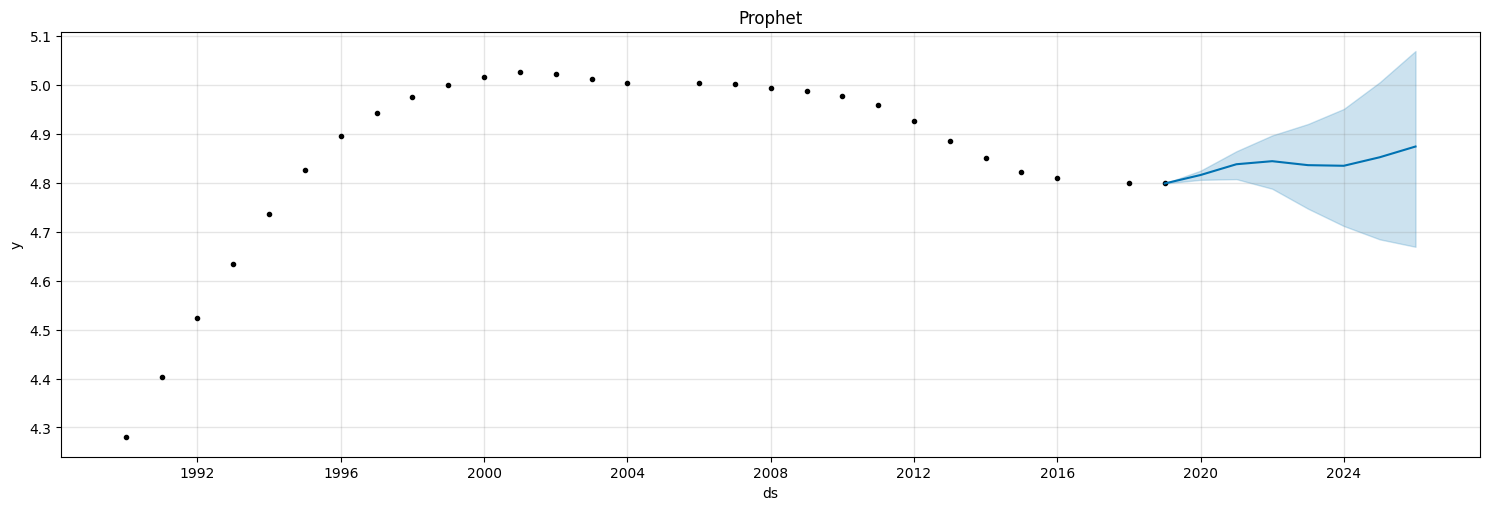

In [26]:

from prophet import Prophet

# Prepare the data for Prophet
prophet_data = na_depressive_data[['year', 'val']].copy()
prophet_data.columns = ['ds', 'y']  # Rename columns

from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(prophet_data, test_size=2, random_state=42)

# Create and fit the Prophet model
model = Prophet(changepoint_range=1, changepoint_prior_scale=0.05)
model.add_seasonality(
    name='yearly',
    period=1825,
    fourier_order=1)
model.fit(train_data)


# Make future predictions
future_dates = pd.date_range(start='2018-01-01', end='2025-12-31', freq='A')
future = pd.DataFrame({'ds': future_dates})
forecast = model.predict(df=future)
#forecast['yhat']=round(forecast['yhat'])

# Plot the forecasted values
fig, ax = plt.subplots(figsize=(15, 5))
model.plot(forecast, ax=ax)
plt.title('Prophet')
plt.show()